In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
import seaborn as sns

In [2]:
!ls

sample_data


In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
Saving test.csv to test.csv
Saving sample_submission.csv to sample_submission.csv
User uploaded file "train.csv" with length 460676 bytes
User uploaded file "test.csv" with length 451405 bytes
User uploaded file "sample_submission.csv" with length 31939 bytes


# **EDA**

In [2]:
# Extracting datasets (training, testing and sampler)

sampler = pd.read_csv("sample_submission.csv")
testing = pd.read_csv("test.csv")
training = pd.read_csv("train.csv")

In [3]:
training.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
testing.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
# Extracting info from dataset

training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

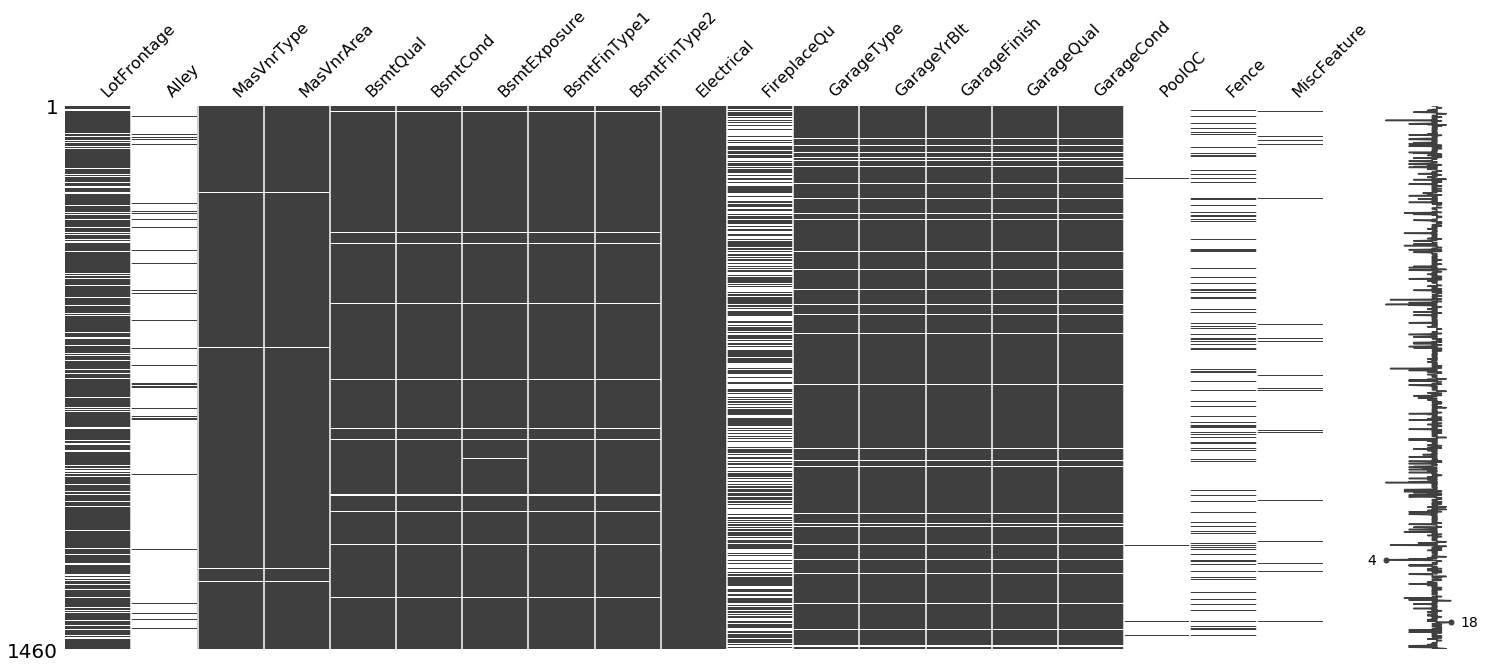

In [6]:
# Visualizing NaN values over columns (matrix)

miss_col = training.columns[training.isnull().any()]
msno.matrix(training[miss_col])

In [7]:
training.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Numeric features

train_num = training.select_dtypes(['float64','int64'])
train_num = train_num.drop('SalePrice', axis=1).values

In [9]:
# Shape

np.shape(train_num)

(1460, 37)

In [10]:
# Categoric features

train_ctg = training.select_dtypes(['object'])
np.shape(train_ctg)

(1460, 43)

In [11]:
train_ctg.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
# Replacing NaNs by median of the column

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(train_num)
train_num = imp.transform(train_num)

# Checking for NaN values
np.any(np.isnan(train_num))

/home/renatochacon/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


False

In [13]:
# Target

y = training['SalePrice'].values

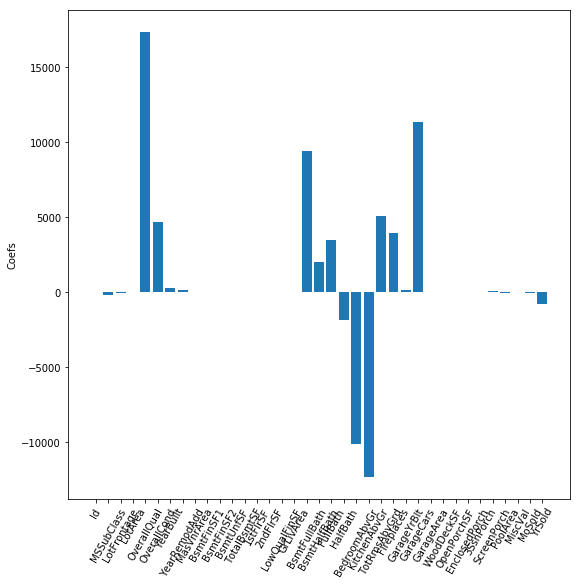

In [14]:
# Using Lasso to plot Coefficients

names = training.select_dtypes(['float64','int64']).drop('SalePrice', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(train_num, y).coef_
plt.figure(1, figsize=(9, 9))
_ = plt.bar(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel("Coefs")
plt.show()

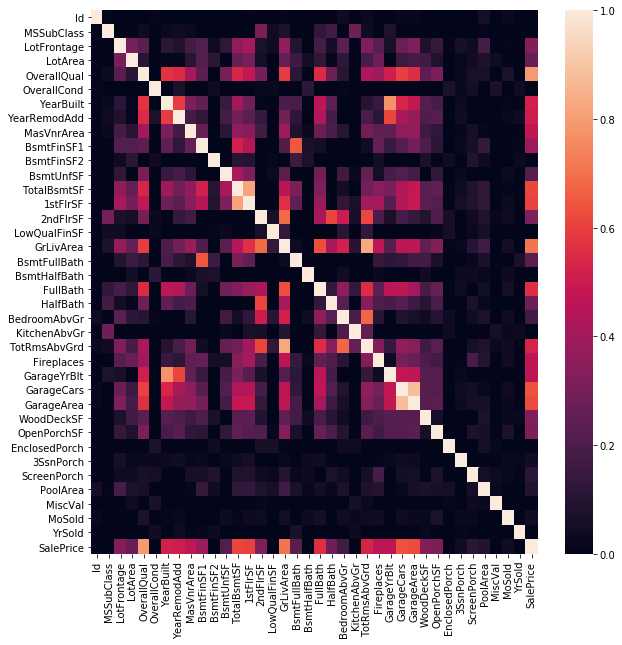

In [15]:
# plotting a heatmap from correlated features

tn_copy = pd.DataFrame(train_num, columns=names)
tn_copy['SalePrice'] = y
plt.subplots(figsize=(10,10))
ax = sns.heatmap(tn_copy.corr(),vmin=0,vmax=1)

In [16]:
#numer = train_num[['OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageCars']]
#numer.head()

In [17]:
train_num = pd.DataFrame(train_num, columns=names)
model = linear_model.LinearRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(train_num[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']], training['SalePrice'])
print(rfe.support_)

[False False False False  True False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True False  True False False False False False False False False False
 False]


In [18]:
LE = LabelEncoder()
names2 = training.select_dtypes(['object']).columns
train_ctg = pd.DataFrame(train_ctg, columns=names2)
for column in train_ctg:
    
    train_ctg[column].fillna('N/A', inplace=True)
    train_ctg[column] = LE.fit_transform(train_ctg[column])
    
train_ctg.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


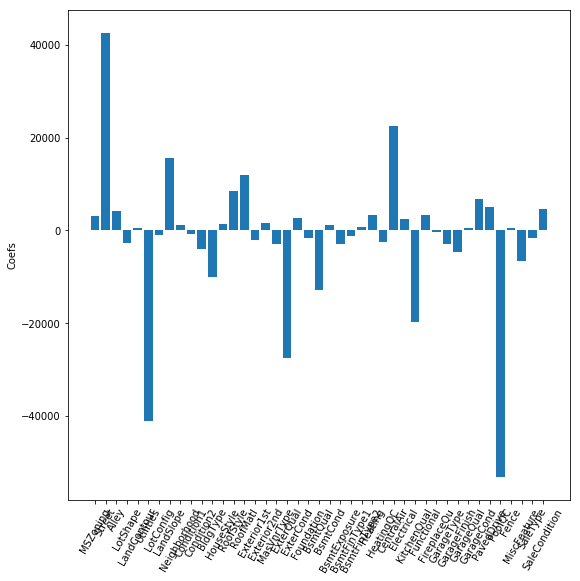

In [19]:
lasso2 = Lasso(alpha=0.1)
lasso_coef2 = lasso2.fit(train_ctg, y).coef_
plt.figure(1, figsize=(9, 9))
_ = plt.bar(range(len(names2)), lasso_coef2)
_ = plt.xticks(range(len(names2)), names2, rotation=60)
_ = plt.ylabel("Coefs")
plt.show()

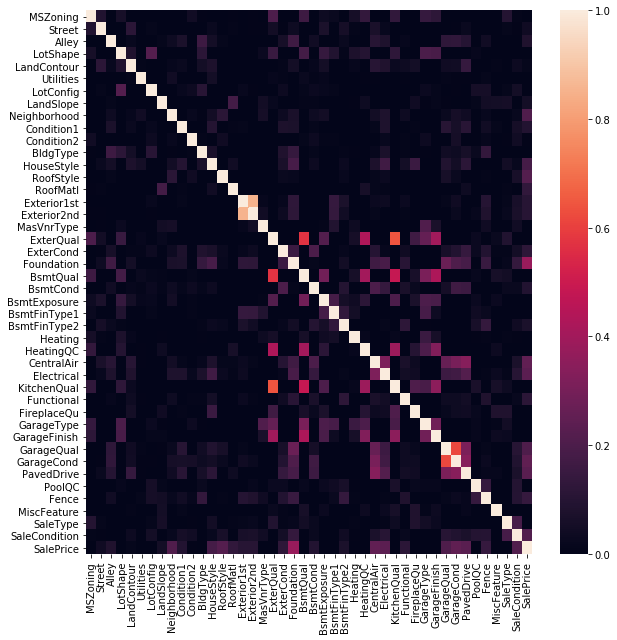

In [20]:
tc_copy = pd.DataFrame(train_ctg, columns=names2)
tc_copy['SalePrice'] = y
plt.subplots(figsize=(10,10))
ax = sns.heatmap(tc_copy.corr(),vmin=0,vmax=1)

In [21]:
rfe2 = RFE(model, 15)
rfe2 = rfe2.fit(train_ctg[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']], y)
print(rfe2.support_)

[False  True False False False False False  True False False False  True
 False  True  True False False False  True False False  True False False
 False False False False  True False  True False False  True  True False
  True  True  True False  True False False]


In [22]:
#categ = train_ctg[['Street','LandSlope','BldgType','RoofStyle','RoofMatl','ExterQual','BsmtQual','CentralAir','KitchenQual','GarageType', 'GarageFinish','GarageCond', 'PavedDrive', 'PoolQC','MiscFeature']]
#categ.head()

In [23]:
#training_set = pd.concat([categ, numer], axis=1)

In [24]:
#training_set.info()

In [25]:
#training_set.describe()

In [26]:
#training_set.columns

In [27]:
#testing_set = testing[['Street', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual',
#      'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish',
#       'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'OverallQual',
#       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
#       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']]
#testing_set

In [28]:
#names_ts = testing_set.columns
#for col in testing_set:
#    if col == 'Street' or col =='LandSlope' or col =='BldgType' or col=='RoofStyle' or col =='RoofMatl'\
#    or col=='ExterQual' or col=='BsmtQual' or col=='CentralAir' or col=='KitchenQual'\
#    or col=='GarageType' or col=='GarageFinish'or col=='GarageCond' or col=='PavedDrive' \
#    or col=='PoolQC' or col=='MiscFeature':
#        testing_set[col].fillna('N/A', inplace=True)
#        testing_set[col] = LE.fit_transform(testing_set[col])
        
#    else:
        #imp.fit(testing_set)
        #testing_set[col] = imp.transform(testing_set[col])
        #testing_set.fillna(0, inplace=True)
        #testing_set[col] = testing_set[col].fillna(testing_set[col].median())
        #testing_set = testing_set.fillna(testing_set.median())
#        imp.fit(testing_set)
#        testing_set = imp.transform(testing_set)

    
#testing_set = pd.DataFrame(testing_set, columns=names_ts)
#testing_set.head()

In [29]:
#np.any(np.isnan(testing_set))

# **MACHINE LEARNING**

In [30]:
numer_copy = train_num.copy()
categ_copy = train_ctg.copy()
training_set_o = pd.concat([numer_copy, categ_copy], axis=1)

X_o = training_set_o.drop(['Id','SalePrice'], axis=1).values
#y_o = training_set_o['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X_o, y,test_size = 0.3, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,test_size = 0.3, random_state=42)

In [31]:
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [32]:
lr_model.score(X_test, y_test)

0.8445920965894996

In [33]:
rfg_model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5, random_state = 101)
model_2 = rfg_model.fit(X_train, y_train)
predicts = model_2.predict(X_test)

In [34]:
model_2.score(X_test, y_test)

0.884591533760546

In [35]:
scores = cross_val_score(model_2, X_train, y_train)
mean = scores.mean()
print(scores)
print(mean)

/home/renatochacon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81690408 0.79284468 0.87894799]
0.829565583356061


In [36]:
model_treereg = ExtraTreesRegressor(n_estimators=100, min_samples_leaf=5, random_state=101)

model_3 = model_treereg.fit(X_train, y_train)

pred_3 = model_treereg.predict(X_test)

In [37]:
model_3.score(X_test, y_test)

0.8766668184810272

In [38]:
# Using GridSearch on Random Forest Regressor


param_grid = {"n_estimators": [10,100],
              "max_features": [1, 3, 10, 'auto', None],
              "min_samples_leaf": [1, 2, 3, 5],
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}


grid_search = GridSearchCV(model_2, param_grid = param_grid)
grid_search.fit(X_train, y_train)

/home/renatochacon/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100], 'max_features': [1, 3, 10, 'auto', None], 'min_samples_leaf': [1, 2, 3, 5], 'bootstrap': [True, False], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
grid_search.cv_results_

/home/renatochacon/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/renatochacon/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/renatochacon/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/renatoc

{'mean_fit_time': array([2.51053969e-02, 1.02428595e-01, 7.45836894e-03, 9.33221976e-02,
        7.79914856e-03, 9.06489690e-02, 8.90199343e-03, 5.28271198e-02,
        9.39162572e-03, 1.18482192e-01, 1.17189089e-02, 1.02973700e-01,
        7.75122643e-03, 8.02408059e-02, 9.86544291e-03, 8.18200111e-02,
        1.59688791e-02, 2.09717433e-01, 1.61666075e-02, 1.98889573e-01,
        1.49899324e-02, 1.75740798e-01, 1.95012887e-02, 1.55709585e-01,
        1.23299042e-01, 1.08232077e+00, 6.85722828e-02, 9.09102281e-01,
        6.76167806e-02, 7.57460276e-01, 6.95210298e-02, 6.74638987e-01,
        1.06934071e-01, 1.07835317e+00, 8.51689180e-02, 8.72162898e-01,
        9.20668443e-02, 7.36619234e-01, 7.00885455e-02, 6.74381733e-01,
        6.60092036e-02, 4.72394307e-01, 3.15253735e-02, 3.21922541e-01,
        3.44486237e-02, 2.95221647e-01, 2.80469259e-02, 2.44869391e-01,
        7.94219176e-02, 7.10962534e-01, 4.14942900e-02, 5.21333853e-01,
        6.11332258e-02, 4.88499800e-01, 4.50523

In [40]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_features': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [41]:
rfg_model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, random_state = 101, bootstrap=False, 
                                 criterion='mse', max_features=10)

model_4 = rfg_model.fit(X_train, y_train)


pred_4 = model_4.predict(X_test)

In [42]:
model_4.score(X_test, y_test)

0.8957212506776424

In [43]:
submission_house = pd.DataFrame()
submission_house['Id'] = sampler['Id']
#submission_house['SalePrice'] = pred_4
#submission_house.to_csv('submission_house.csv', index=False)

In [44]:
pred_4

array([140981.25, 315489.83, 118490.  , 156559.  , 313927.02,  83835.04,
       206969.05, 149931.  ,  82789.5 , 125684.  , 136015.02, 116172.25,
       127992.13, 204751.35, 179598.  , 129005.75, 196895.83, 136925.  ,
       117263.5 , 210889.82, 183776.  , 221931.95, 182568.17, 125499.34,
       196411.95, 182037.88, 183958.39, 108197.5 , 181890.35, 206157.68,
       129392.  , 268226.86, 211539.68, 113742.5 , 259943.74, 144272.6 ,
       146632.53, 205859.68, 303224.77, 110744.5 , 125699.6 , 234617.57,
       119535.  , 383165.43, 131874.1 , 142968.01, 116673.25, 124736.5 ,
       418587.38, 136399.73, 119599.  , 202419.  , 122794.6 , 309493.65,
       144407.  , 245797.45, 203674.45, 154460.77, 150092.5 , 115999.1 ,
        79105.  , 144032.39, 296083.08, 263942.58, 290266.19, 216068.71,
       111501.88, 307609.88, 111759.  , 168292.64, 120983.44, 133094.83,
       112684.  ,  96916.17, 435217.02, 188367.81, 299793.9 , 307848.79,
       138681.5 , 120764.34, 103922.  , 102364.5 , 

In [45]:
pred_4.shape

(438,)

In [46]:
sampler.shape

(1459, 2)

In [47]:
testing_set = testing
#[['Street', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual',
#      'BsmtQual', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish',
#       'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'OverallQual',
#       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
#       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']]
#testing_set

In [48]:
test_ctg = testing_set.select_dtypes(['object'])
test_ctg.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
names_num_test = testing_set.select_dtypes(['float64','int64']).columns
test_num = testing_set.select_dtypes(['float64','int64'])
imp.fit(test_num)
test_num = imp.transform(test_num)
test_num = pd.DataFrame(test_num, columns=names_num_test)


In [50]:
names_ctg_test = testing_set.select_dtypes(['object']).columns
test_ctg = pd.DataFrame(test_ctg, columns=names_ctg_test)
for column in test_ctg:
    
    test_ctg[column].fillna('N/A', inplace=True)
    test_ctg[column] = LE.fit_transform(test_ctg[column])

In [51]:
test_set = pd.concat([test_num, test_ctg], axis=1)
test_set = test_set.drop('Id', axis=1)

In [52]:
model_5 = rfg_model.fit(X_o, y)

pred_5 = model_4.predict(test_set)

In [53]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [54]:
submission['SalePrice'] = pred_5
submission.to_csv('submission_house_prices.csv', index=False)

In [55]:
sub = pd.read_csv('submission_house_prices.csv')
sub

,Id,SalePrice
0,1461,122186.32
1,1462,153455.20
2,1463,173396.50
3,1464,179507.72
4,1465,187130.26
5,1466,176679.35
6,1467,171104.86
7,1468,168165.30
8,1469,179270.54
9,1470,128450.26
